In [205]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [206]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df = df.drop('id',axis=1)
df.head(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [207]:
df.shape

(5110, 11)

In [208]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [209]:
categorical_features = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status','stroke']
unique_values = {col:df[col].unique() for col in categorical_features}


In [210]:
for col, values in unique_values.items():
    print(f'{col}: {values}')

gender: ['Male' 'Female' 'Other']
hypertension: [0 1]
heart_disease: [1 0]
ever_married: ['Yes' 'No']
work_type: ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Residence_type: ['Urban' 'Rural']
smoking_status: ['formerly smoked' 'never smoked' 'smokes' 'Unknown']
stroke: [1 0]


In [211]:
df.duplicated().sum()

0

In [212]:
y = df['stroke']
y.value_counts(normalize=True)*100

stroke
0    95.127202
1     4.872798
Name: proportion, dtype: float64

In [213]:
import plotly.express as px
px.bar(x=y.value_counts().index, y=y.value_counts(), color = y.value_counts().index)

In [214]:
numerical_features = ['age','avg_glucose_level', 'bmi']
df[numerical_features].describe()

,age,avg_glucose_level,bmi
count,5110.000000,5110.000000,4909.000000
mean,43.226614,106.147677,28.893237
std,22.612647,45.283560,7.854067
min,0.080000,55.120000,10.300000
25%,25.000000,77.245000,23.500000
50%,45.000000,91.885000,28.100000
75%,61.000000,114.090000,33.100000
max,82.000000,271.740000,97.600000


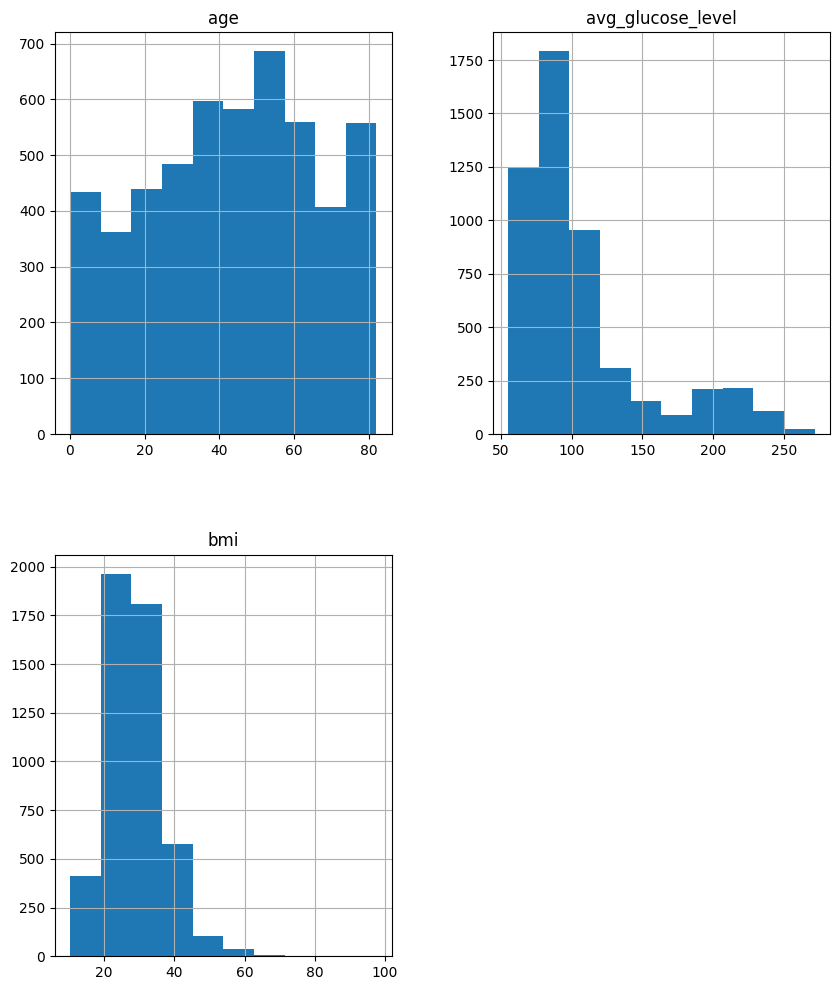

In [215]:
df[numerical_features].hist(figsize=(10,12))
plt.show()

In [216]:
fig = px.histogram(df, x='gender', width = 400)
fig.show()

In [217]:
round(df[df['gender']=='Male']['stroke'].mean()*100,1)

5.1

In [218]:
round(df[df['gender']=='Female']['stroke'].mean()*100,1)

4.7

In [219]:
fig = px.histogram(df, x='hypertension', width = 400)
fig.show()

In [220]:
round(df[df['hypertension']==0]['stroke'].mean()*100,1)

4.0

In [221]:
fig = px.histogram(df, x='heart_disease', width = 400)
fig.show()

In [222]:
round(df[df['heart_disease']==1]['stroke'].mean()*100,1)

17.0

In [223]:
fig = px.histogram(df, x='ever_married', width = 400)
fig.show()

In [224]:
round(df[df['ever_married']=='No']['stroke'].mean()*100,1)

1.7

In [225]:
fig = px.histogram(df, x='work_type', width = 400)
fig.show()

In [226]:
stroke_percentage_work_type = df.groupby('work_type')['stroke'].mean()*100
stroke_percentage_work_type.sort_values(ascending=False)

work_type
Self-employed    7.936508
Private          5.094017
Govt_job         5.022831
children         0.291121
Never_worked     0.000000
Name: stroke, dtype: float64

In [227]:
fig = px.histogram(df, x='Residence_type', width = 400)
fig.show()

In [228]:
stroke_percentage_Residence_type = df.groupby('Residence_type')['stroke'].mean()*100
stroke_percentage_Residence_type.sort_values(ascending=False)

Residence_type
Urban    5.200308
Rural    4.534606
Name: stroke, dtype: float64

In [229]:
fig = px.histogram(df, x='smoking_status', width = 400)
fig.show()

In [230]:
stroke_smoking_status = df.groupby('smoking_status')['stroke'].mean()*100
stroke_smoking_status.sort_values(ascending=False)

smoking_status
formerly smoked    7.909605
smokes             5.323194
never smoked       4.756871
Unknown            3.044041
Name: stroke, dtype: float64

In [231]:
from sklearn.metrics import mutual_info_score
categorical_features = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status','stroke']
for col in categorical_features:
    mi = mutual_info_score(df[col], df['stroke'])
    print(f'{col}:{mi:2f}')

gender:0.000051
hypertension:0.005976
heart_disease:0.005897
ever_married:0.006950
work_type:0.006825
Residence_type:0.000120
smoking_status:0.002750
stroke:0.194753


In [232]:
df[numerical_features + ['stroke']].corr()

,age,avg_glucose_level,bmi,stroke
age,1.000000,0.238171,0.333398,0.245257
avg_glucose_level,0.238171,1.000000,0.175502,0.131945
bmi,0.333398,0.175502,1.000000,0.042374
stroke,0.245257,0.131945,0.042374,1.000000


<h3> Training the ML models </h3>

In [233]:
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.preprocessing import PowerTransformer, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

numerical = ['avg_glucose_level', 'bmi', 'age']
categorical = ['hypertension','heart_disease','ever_married','work_type','Residence_type','smoking_status']

transformer = ColumnTransformer(transformers = [
    ('num', Pipeline(steps=[('imputer', SimpleImputer(strategy='median', )),('power' ,PowerTransformer(method = 'yeo-johnson',standardize=True))]), numerical),
    ('cat', OneHotEncoder(), categorical )
])




In [234]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression

def get_models():
    models, names = list(), list()
    models.append(LogisticRegression(solver = 'liblinear'))
    names.append('LR')
    models.append(LinearDiscriminantAnalysis())
    names.append('LDA')
    models.append(RandomForestClassifier(n_estimators=100))
    names.append('RF')
    return models, names
    
def evaluate_models(X,y,model):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
    scores = cross_val_score(model, X,y,scoring ='roc_auc', cv=cv, n_jobs=-1)
    return scores

In [235]:
from imblearn.pipeline import Pipeline as IMBPipeline

y= df['stroke']
X = df.drop('stroke', axis=1)

models, names = get_models()
results = list()
for i in range(len(models)):
    IMBpipeline = IMBPipeline(steps=[('transformer', transformer), ('smote',SMOTE()), ('model', models[i])])
    scores = evaluate_models(X,y,IMBpipeline)
    results.append(scores)
    print('>%s: ROC-AUC = %.3f (%.3f)' % (names[i], np.mean(scores), np.std(scores)))

>LR: ROC-AUC = 0.835 (0.029)
>LDA: ROC-AUC = 0.837 (0.030)
>RF: ROC-AUC = 0.780 (0.027)


In [236]:
import joblib
joblib.dump(scores,'model.pkl')

['model.pkl']

In [237]:
X


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked
...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked


In [238]:
y

0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5110, dtype: int64